In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_scatter(mean, cov, size):

    # Generate the random realizations
    realizations = np.random.normal(0,1,size=(size, 2))
    eigvalues, eigvectors = np.linalg.eig(cov)

    # Transform the realizations
    transformed = np.dot(eigvectors, np.sqrt(np.diag(eigvalues))) @ realizations.T

    # Add the mean to each realization
    realizations = transformed.T + mean

    # Scatter plot
    plt.figure(figsize=(6,6))
    plt.scatter(realizations[:, 0], realizations[:, 1], s=5, alpha=0.5)
    plt.title('5000 Realizations of the Random Vector x')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    return realizations


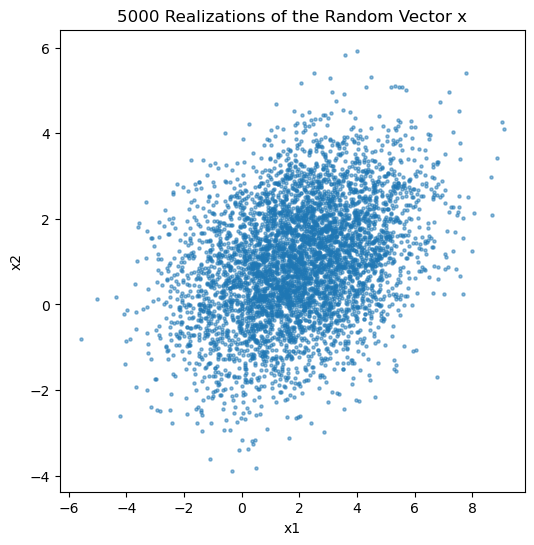

In [3]:
mean_x = [2, 1]
cov_x = [[4, 1], [1, 2]]
x = plot_scatter(mean_x, cov_x, 5000)

In [4]:
def white_Gaussian_vector(mean, cov, size):

    # Generate the random realizations
    realizations = np.random.normal(0,1,size=(size, 2))
#     eigvalues, eigvectors = np.linalg.eig(cov)

#     # Transform the realizations
#     transformed = np.dot(eigvectors, np.sqrt(np.diag(eigvalues))) @ realizations.T

#     # Add the mean to each realization
#     realizations = transformed.T + mean

    # Scatter plot
    plt.figure(figsize=(6,6))
    plt.scatter(realizations[:, 0], realizations[:, 1], s=5, alpha=0.5)
    plt.title('5000 realizations of Gaussian random vector w')
    plt.xlabel('w1')
    plt.ylabel('w2')
    plt.show()
    return realizations


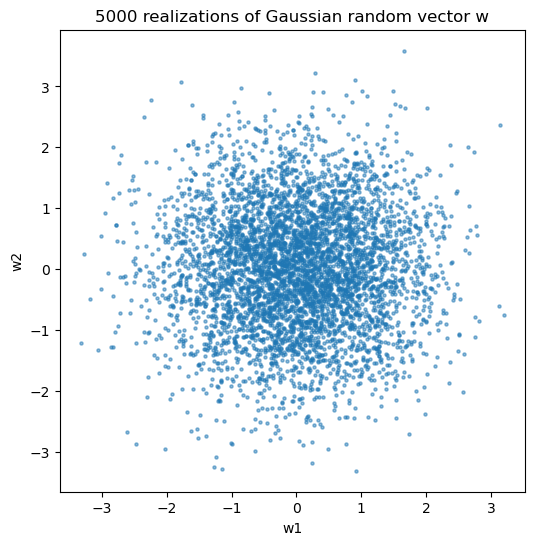

In [5]:
mean_w = [0, 0]
cov_w = [[1, 0], [0, 1]]
w = white_Gaussian_vector(mean_w, cov_w, 5000)

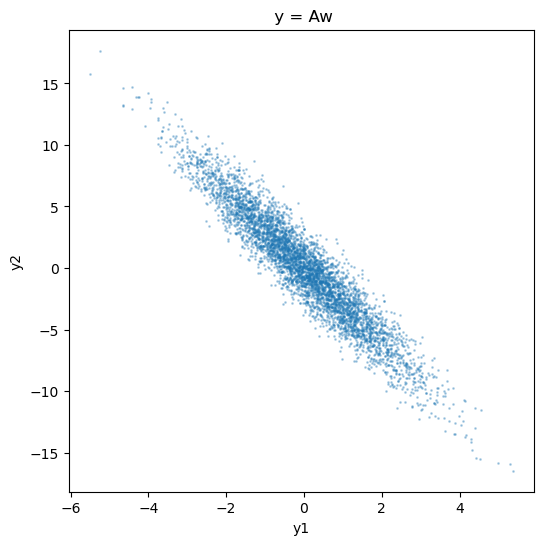

The sample covariance matrix is [[ 2.00033385 -5.99667272]
 [-5.99667272 19.96204433]]
The derived covariance matrix is [[ 2 -6]
 [-6 20]]


In [18]:
# Define the matrices A and w
A = np.array(([-1, -1], [2, 4]))

# w = np.array(w)
# print(A.shape)
# print(w.shape)
y = np.matmul(w, A.T)
# print(y)

plt.figure(figsize=(6,6))
plt.scatter(y[:,0], y[:,1],s = 1, alpha=0.3)
plt.title(' y = Aw')
plt.xlabel('y1')
plt.ylabel('y2')
plt.show()

y_mean = np.mean(y, axis = 0)
N = y.shape[0]
cov_sample = 1/(N - 1) * np.dot((y - y_mean).T, y - y_mean)
cov_derived = A @ A.T

print(f"The sample covariance matrix is {cov_sample}") 
print(f"The derived covariance matrix is {cov_derived}")

In [40]:
def decorrelate(y, cov_y):
    
    # Valculate eigenvalue and eigenvector
    eigvalues, eigvectors = np.linalg.eig(cov_y)
    
    lam = np.diag(eigvalues) 
    E = eigvectors
    
#     print(E)
#     print(y)
    # v = E.T * y
#     v = np.dot(y, E)
    v = np.dot(E.T, y.T).T
    
    # Calculate covariance matrix of v
    cov_v = np.cov(v.T)
    
    # plot scatter
    plt.figure(figsize=(6,6)) 
    plt.scatter(v[:,0], v[:,1], s=1) 
    plt.xlabel('v1')
    plt.ylabel('v2')
    plt.title('5000 realizations of vector v') 
    plt.show()
    print(f'The covariance of v is {cov_v}') 
    return lam, v

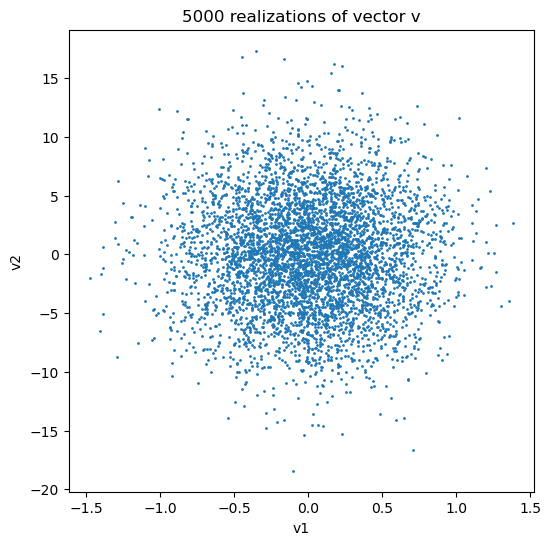

The covariance of v is [[ 1.82310308e-01 -7.85113202e-03]
 [-7.85113202e-03  2.17800679e+01]]


In [41]:
lam_v, v = decorrelate(y, cov_derived)

In [42]:
def whiten(v, lam):
    
    # Define z = lam^(-1/2)v
    lam_2 = np.linalg.inv(np.sqrt(lam))
#     print(lam_2.shape)
#     print(v.shape)
    z = np.dot(v, lam_2)
    
    # calculate covariance
    cov_z = np.cov(z.T)
    
    # plot scatter
    plt.figure(figsize=(6,6))
    plt.scatter(z[:,0], z[:,1], s=1)
    plt.xlabel('z1')
    plt.ylabel('z2')
    plt.title('5000 realizations of vector z')
    plt.show()
    
    print(f'The covariance of z is {cov_z}')

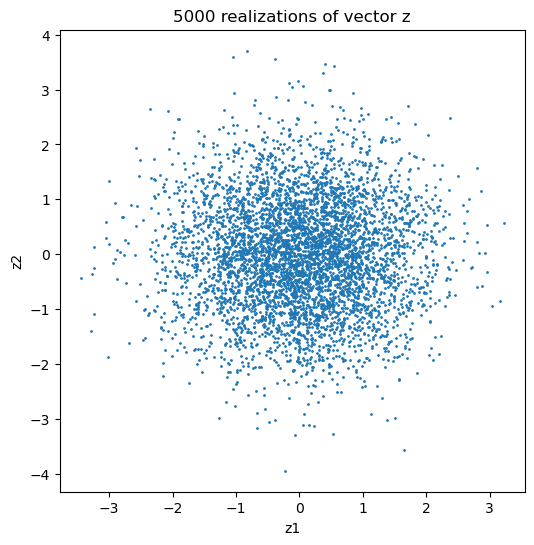

The covariance of z is [[ 0.99435022 -0.00392557]
 [-0.00392557  0.99832303]]


In [43]:
whiten(v, lam)

In [19]:
def decorrelate(y, cov_y):
    '''
    This function decorrelates y and plot the scatter plot of v
    ''' 
    # calculate eigenvalue and eigenvector
    eigvalues, eigvectors = np.linalg.eig(cov_y)
    
    lam = np.diag(eigvalues)
    
    E = eigvectors
    
    # v = E.T * y
    v = np.dot(E.T, y)
#     v = np.dot(y, E)
    
    # calculate covariance
#     cov_v = np.cov(v.T)
    cov_v = np.cov(v)
    print(f'The covariance of v is {cov_v}') 
    
    # plot scatter
    plt.figure(figsize=(6,6)) 
    plt.scatter(v[:,0], v[:,1], s=1) 
    plt.xlabel('v1')
    plt.ylabel('v2')
    plt.title('5000 Realizations of V') 
    plt.show()
    return lam, v

SyntaxError: invalid syntax (880097702.py, line 26)

In [ ]:
lam, v = decorrelate(y, cov_y)